In [51]:
import gensim
import csv
import pandas as pd
import networkx as nx
import itertools
from tqdm import tqdm
import matplotlib as plt
import random as rd

In [36]:
def read_mappings(table):
    with open(table) as fd:
        fd.readline()
        rd = csv.reader(fd, delimiter="\t", quotechar='"')
        mapped_vocab = []
        for a, b, c, d, e in rd:
            mapped_vocab.append(a)
    return mapped_vocab

In [47]:
def create_edges(model, vocab, threshold, filename):
    brown_model = gensim.models.Word2Vec.load(model)
    edges = []
    for word, other_word in tqdm(itertools.combinations(vocab, 2)):
        similarity = brown_model.wv.similarity(word, other_word)
        if similarity > threshold:
            edges.append((word, other_word, similarity))
    print("edges per node:" + str(len(edges)/len(vocab)))
    with open(filename, 'w') as f:
        for edge in edges:
            f.write("%s\n" % str(edge))
    return edges

In [48]:
def create_network(vocab, weighted_edges):
    word2vec_graph = nx.Graph()
    word2vec_graph.add_nodes_from(vocab)
    word2vec_graph.add_weighted_edges_from(weighted_edges)
    return word2vec_graph

In [49]:
mapped_vocab = read_mappings("mapped.tsv")

In [63]:
edges = create_edges("brown_model.model", mapped_vocab_selection, 0.95, "edges.txt")

4950it [00:00, 7820.92it/s]


edges per node:0.68


In [62]:
mapped_vocab_copy = mapped_vocab.copy()
rd.shuffle(mapped_vocab_copy)
mapped_vocab_selection = mapped_vocab_copy[:100]

In [64]:
word2vec_graph = create_network(mapped_vocab_selection, edges)

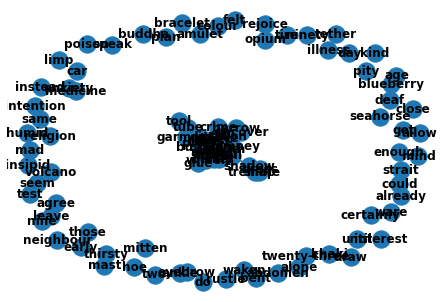

In [65]:
nx.draw(word2vec_graph, with_labels=True, font_weight='bold')

In [3]:
df = pd.DataFrame(index=mapped_vocab, columns=mapped_vocab)

In [4]:
brown_model = gensim.models.Word2Vec.load("brown_model.model")
threshold = 0.5
edges = []
for word in mapped_vocab:
    for other_word in mapped_vocab:
        if pd.isnull(df.loc[word, other_word]):
            similarity = brown_model.wv.similarity(word, other_word)
            df.at[word, other_word] = similarity

KeyboardInterrupt: 

In [14]:
df.to_csv('similarities_df.csv')

In [26]:
edges = []
for node in mapped_vocab:
    for other_node in mapped_vocab:        
        similarity = df.loc[node, other_node]
        edge = (node, other_node, {'weight': similarity})
        if not (other_node, node, {'weight': similarity}) in edges:
            edges.append(edge)

KeyboardInterrupt: 

In [ ]:
print(edges[:10])

In [ ]:
for (columnName, columnData) in empDfObj.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.values)